In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

<font color='blue'>
**In this dataset we will predict the prices of the cars by using a supervised machine learning algorithms with respect to given features. **



# 1. Exploratory Data Analysis:

In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [5]:
df.isnull().sum()
#There are few missing values in the data set 

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
df.dropna(inplace=True) # we just drop these rows with missing values
df.isnull().sum()
#Now there is no  missing values

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

In [7]:
df.corr()["price"].sort_values(ascending=False)
# here we can see the correlations between the target and the other features

price                1.000000
engine-size          0.889265
curb-weight          0.828483
city-L/100km         0.803669
horsepower           0.802040
width                0.744176
length               0.689466
wheel-base           0.591956
bore                 0.544375
height               0.182407
normalized-losses    0.138183
diesel               0.117725
stroke               0.107893
compression-ratio    0.067759
symboling           -0.076420
peak-rpm            -0.103535
gas                 -0.117725
city-mpg            -0.692550
highway-mpg         -0.707466
Name: price, dtype: float64

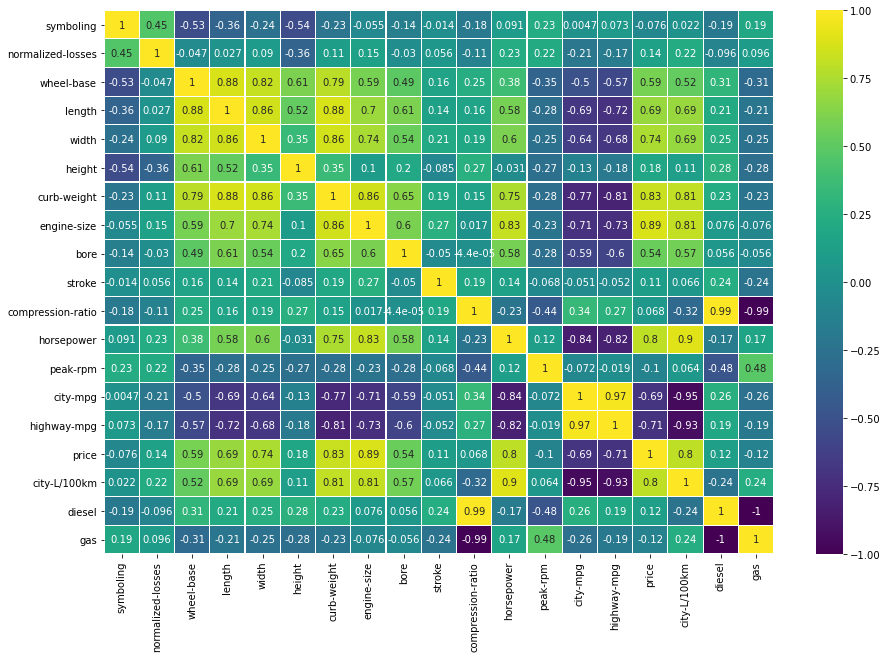

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, cmap="viridis")
#Here we visualize all of the correlations between the columns

<Figure size 1080x720 with 0 Axes>

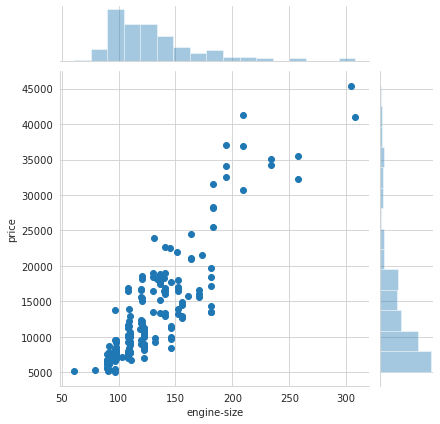

In [9]:
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
sns.jointplot(x="engine-size", y="price", data=df)
#Here is the plot between the target variable and the feature with the highest correlation value

# 2. Simple Linear Regression:

<font color='blue'>
<li>Simple Linear Regression is an algorithm to show the relationship between two variables  and to predict the dependent(target) variable as a function of the feature (independent) variable. </li>


<b>Simple Linear Regression Function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a represents the <b>intercept</b> of the regression line </li>
    <li>b represents the <b>slope</b> of the regression line, which means how much Y changes when X increases by 1 unit</li>
</ul>


In [10]:
# here we will make a simple linear regression between highway-mpg and price
x=df[['highway-mpg']]
y=df["price"]

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 196

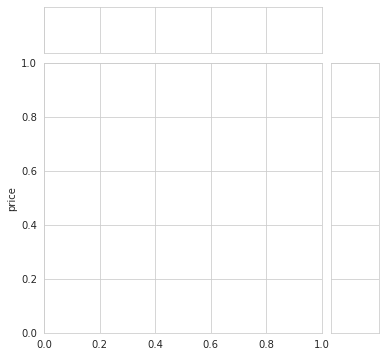

In [11]:
sns.jointplot(x,y)
# we see that there is a neagtive correlation between the two

In [12]:
df.corr()["price"]["highway-mpg"]
# the correlation r is -0.7

-0.7074662427380926

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model=LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.3)

In [17]:
model.fit(X_train,y_train)
#Here we fit our modl into the training set

LinearRegression()

In [18]:
predictions=model.predict(X_test)

In [19]:
model.intercept_
#This is the intercept of the function for predictions

41985.855030134226

In [20]:
model.coef_

array([-922.94907303])

<font color='red'>
Our predicition simple linear regression function 
$$
Yhat = a + b  X
$$

$$
Yhat = 38423.31 - 821.73 X 
$$


In [21]:
model.score(x_train,y_train)

NameError: name 'x_train' is not defined

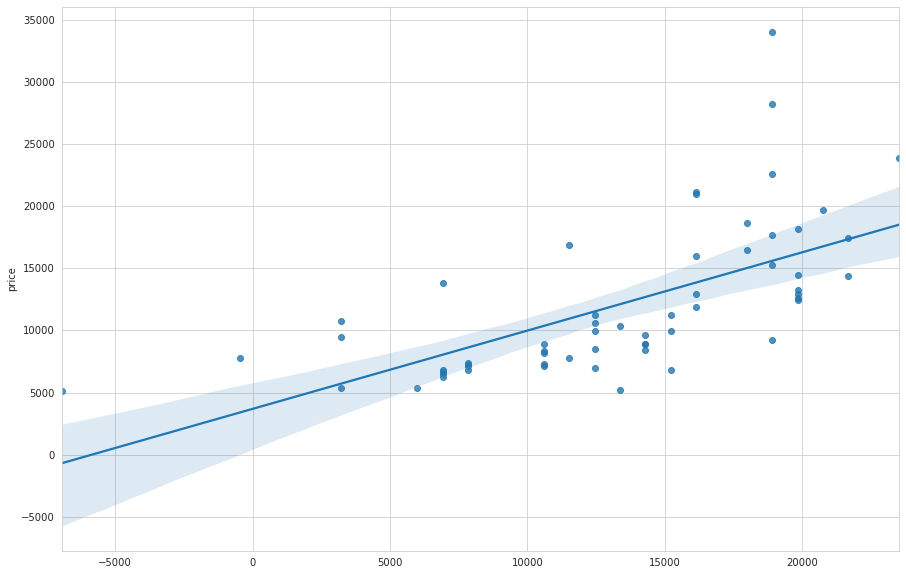

In [22]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y=y_test, data=df)

 # 3. Multiple Linear Regression:

<font color='blue'>
**Simple linear regression use a single predictor variable X to model the response variable Y. In many applications, there
is more than one factor that influences the response. Multiple regression models thus describe how a single response variable Y depends linearly on a number of predictor variables.**

<font color='red'>
Formula and Calcualtion of Multiple Linear Regression
\begin{aligned} &y_i = \beta_0 + \beta _1 x_{i1} + \beta _2 x_{i2} + ... + \beta _p x_{ip} + \epsilon\\ &\textbf{where, for } i = n \textbf{ observations:}\\ &y_i=\text{dependent variable}\\ &x_i=\text{expanatory variables}\\ &\beta_0=\text{y-intercept (constant term)}\\ &\beta_p=\text{slope coefficients for each explanatory variable}\\ &\epsilon=\text{the model's error term (also known as the residuals)}\\ \end{aligned} 
​	  
y 
i
​	 =β 
0
​	 +β 
1
​	 x 
i1
​	 +β 
2
​	 x 
i2
​	 +...+β 
p
​	 x 
ip
​	 +ϵ
where, for i=n observations:
y 
i
​	 =dependent variable
x 
i
​	 =expanatory variables
β 
0
​	 =y-intercept (constant term)
β 
p
​	 =slope coefficients for each explanatory variable
ϵ=the model’s error term (also known as the residuals)
​	

In [23]:
X = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y=df["price"]

In [24]:
model2=LinearRegression()

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

In [26]:
model2.fit(X_train, y_train)

LinearRegression()

In [27]:
model.intercept_
#The intecept of our model

41985.855030134226

In [28]:
model2.coef_
#These are coeeficients of our model with respecto four feature we used 

array([ 34.21892111,   5.7703838 , 102.6460443 , 131.39317121])

<font color='red'>
$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


$$
Price = -16367.19 + 28.30211432 x Horsepower + 3.33859201 x Curb-weight + 131.57409552 x Engine-size + 49.82157175 x Highway-mpg
$$

# 4. Model Evaluation:

4.1. Visual Evaluation

In [29]:
predictions2= model2.predict(X_test)

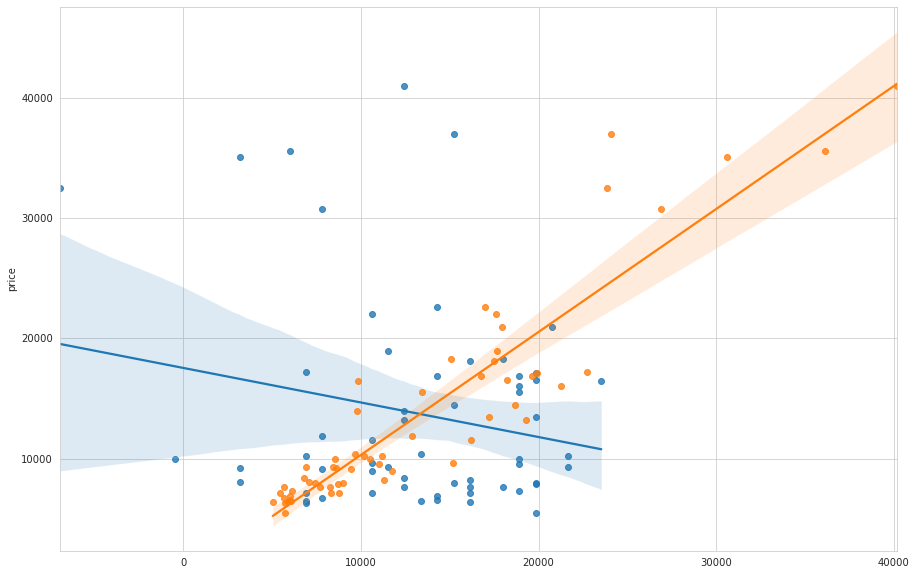

In [30]:
plt.figure(figsize=(15,10))
sns.regplot(x=predictions, y=y_test, data=df,label="Simple Linear Regression")
sns.regplot(x=predictions2, y=y_test, data=df, label="Multiple Linear Regression")
# It is obvius that multiple regression predicts better than simple linear regression


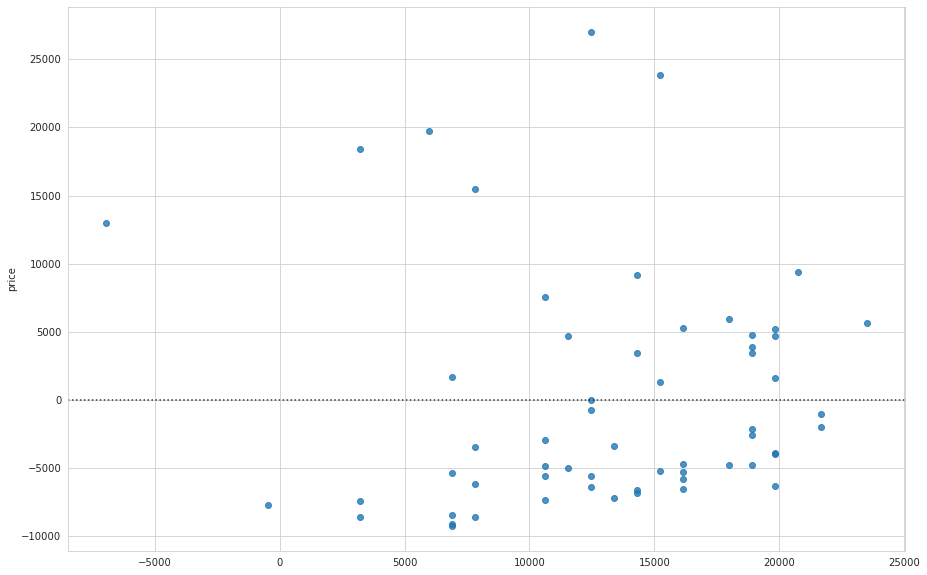

In [31]:
plt.figure(figsize=(15,10))
sns.residplot(x=predictions, y=y_test, data=df,label="Simple Linear Regression")

<font color='blue'>
Residual plot, returns the difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

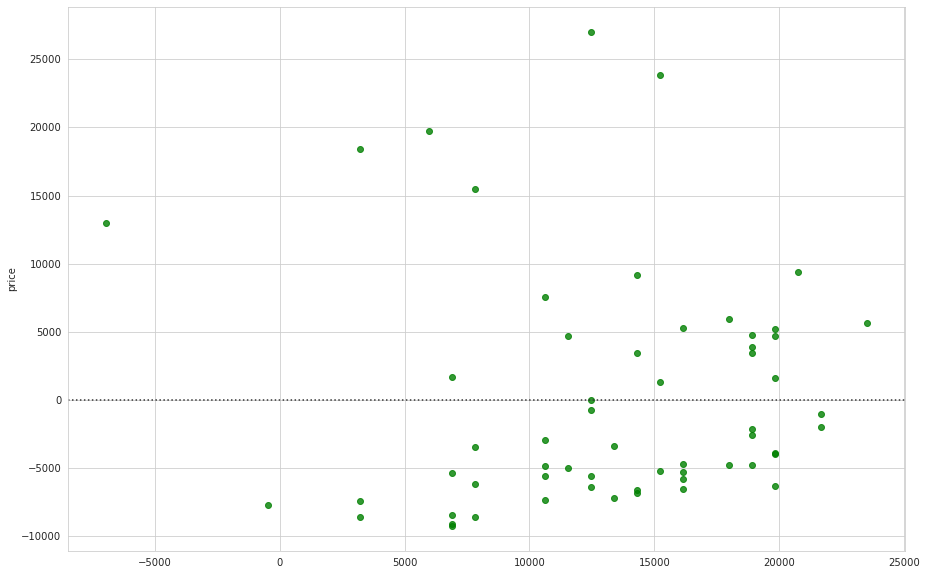

In [32]:
plt.figure(figsize=(15,10))
sns.residplot(x=predictions, y=y_test, data=df,label="Simple Linear Regression", color="green")

<font color='blue'>
The points in a residual plot are <b>randomly spread out around the x-axis</b> in both simple linear and multiple linear regression, so a <b>linear model is appropriate</b> for the data because randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

Text(0.5, 1.0, 'Actual vs Fitted Values for Price in Simple Linear Regression')

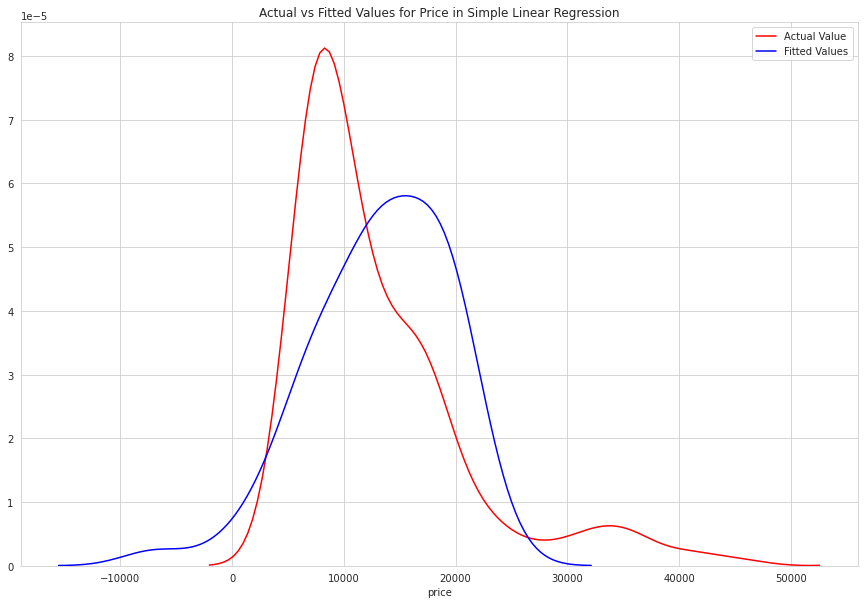

In [33]:
plt.figure(figsize=(15,10))
sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values")


plt.title('Actual vs Fitted Values for Price in Simple Linear Regression')


<font color='blue'>
In th ethe two latets distribution plot, we can easily see that multiple linear regression performs better than simple linear regression. According to the distribution of the simple linear regression, the model can not explain the data after 30 000, but the multiple linear regression can explain more prices to 45 000 dolar and predicts very close to the actual values.

Text(0.5, 1.0, 'Actual vs Fitted Values for Price in Multiple Linear Regression')

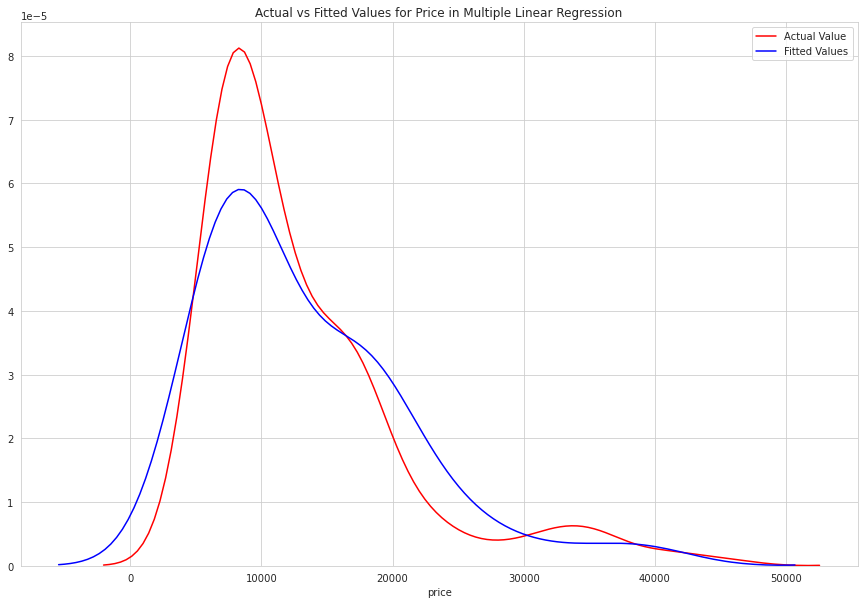

In [34]:
plt.figure(figsize=(15,10))
sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(predictions2, hist=False, color="b", label="Fitted Values" )


plt.title('Actual vs Fitted Values for Price in Multiple Linear Regression')

4.2. Quantitative Evaluation

<font color='blue'>
In order to evaluate quantitatively, there are two very important measures that are often used in Statistics to determine the accuracy of a model are:

R^2 / R-squared
Mean Squared Error (MSE)
R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [35]:
model.score(X,y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 4)

<font color='blue'>
We can say that ~%81.2 of the variation of the price is explained by this simple linear model and ~%81.6 of the variation of the price is explained by multiple linear regression which we used just 4 features. The variance will increase when we take into account other features.

In [36]:
model2.score(X,y)

0.8147550646599866

In [37]:
# I will evaluate our models' performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 7932.66663387998
MSE: 131342500.22856839
RMSE: 11460.47556729512


<font color='blue'>
We can easily see that errors are lower in multiple linear regression than simple linear regression

In [38]:
print("MAE:",metrics.mean_absolute_error(y_test,predictions2))
print ("MSE:",metrics.mean_squared_error(y_test,predictions2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions2)))

MAE: 2371.1853005476833
MSE: 11332895.58480645
RMSE: 3366.436630148628


In [39]:
metrics.explained_variance_score(y_test,predictions)

-0.7930651308236496

<font color='blue'>
Explained variance score also higher in in multiple linear regression than simple linear regression

In [40]:
metrics.explained_variance_score(y_test,predictions2)

0.8468829110459146

# Decision Making and Determining a Good Model Fit

 <font color='blue'>
 we have evaluated the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.Multiple Linear regression outperformed the Simple Linear Regression.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.Multiple Linear regression lower error scores than the Simple Linear Regression.</p>


<font color='blue'>
<p> We think  that the more variables you have, the better your model is at predicting, but this is not always true. Sometimes we may not have enough data, we may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, we should always check the MSE and R^2.</p>

<p>So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>